# Apurva Deore 


### Importing neessary modules

In [358]:
import pandas as pd
import numpy as np
import urllib
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tokenize import tokenize

In [359]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [360]:
import re
import requests

## TASK 1: Selecting Three Categories

In [339]:
original_link = "http://mlg.ucd.ie/modules/yalp/"  #Storing the main link that directs to the main page

### Creating a function to Parse data from any Website

In [361]:
#https://realpython.com/beautiful-soup-web-scraper-python/

def website_parse(site):
    site = site
    html = requests.get(site)
    content = BeautifulSoup(html.content, "html.parser")   
    return content

In [362]:
#Function that scrapes the already parsed webpage returned from above code
def website_scrape(p):
    links = []
    
    for a in p.find_all('a', href=True):    #finding all the anchor tags
        if p.text:
            links.append(a['href'])     #provides a list of links(hrefs) in the webpage
    links.pop(0)
    return links


In [363]:
#Function to create a dataframe which stores reviews and ratings labelled as positive or negative

def createdf(mycategories):   
    df = []
    textualdata = []
    rate = []
    
    for businesslink in mycategories:
        parsing = website_parse(original_link + businesslink)
        
        for texts in parsing.findAll('p', class_ ="review-text"):
            textualdata.append(texts.text)
            
        for rates in parsing.findAll('img'):
            if rates.get('alt') != None:
                
                if int(rates.get('alt').split()[0][0]) < 4:
                    rate.append('Negative')
                else:
                    rate.append('Positive')
                            
    df = pd.DataFrame(list(zip(textualdata, rate)), columns =['Reviews', 'Rating'])
    return df

In [364]:
parsingpage = website_parse(original_link) 
List_of_business = website_scrape(parsingpage) #list of links for all business
print(List_of_business)

['automotive_list.html', 'cafes_list.html', 'fashion_list.html', 'gym_list.html', 'hair_salons_list.html', 'hotels_list.html', 'restaurants_list.html']


In [365]:
mycategories = []
for business in List_of_business[0:3]: #selecting first 3 businesses categories: Automative, Cafes and Fashion
    businessparse = website_parse(original_link + business) #to parse data from the main page and the categories selected
    mycategories.append(website_scrape(businessparse))  #passing it through a function to scrape data from the links

In [366]:
mycategories

[['review_set_BS4u8wkRb70FDBZcYkJ9kQ.html',
  'review_set_3O2HLFpUZKWxE55Mpzg81g.html',
  'review_set_jeG-c5GwD0Uf0Ou5DLFTZg.html',
  'review_set_UGQEXFibRZIebMRkuJqh3Q.html',
  'review_set_o1IS7-SvFXmijKDc6UY55Q.html',
  'review_set_iojTeSaoPuxm4WeCzDUA6w.html',
  'review_set_vadTcg3fvqiXj0Bh9Lv3zg.html',
  'review_set_LPgOZAUsuLlAyGMqLiZiDw.html',
  'review_set_C6z99t2F3xMtq85BQX9Y0w.html',
  'review_set_75CuAwTs4Mt05DDPr5IgAA.html',
  'review_set_ZtBW0tQrqdIg4U303IFJGQ.html',
  'review_set_yYMOgYW0eYtAyjGN08WzMA.html',
  'review_set_06I2r8S3tHP_LwGnnkk6Uw.html',
  'review_set_zIlLvHaSd5TePD7bmWAbfg.html',
  'review_set_uUHiE2wgrz8SZmiWDcfPow.html',
  'review_set_fEylCY3UEH8YJ0Xa7lu6lA.html',
  'review_set_6lfGG1LvT8OthWEh9Us-Hg.html',
  'review_set_6nWyU5V3yINOq_DNWbpRDg.html',
  'review_set_fFClJbyFz-_Edv9lNy6fkQ.html',
  'review_set_31CsUV4qPnFleXR0aV8OPw.html',
  'review_set_PJbwMeZctljcMfxVo2Qacw.html',
  'review_set_SnpFUqKG6ZjurXYq5wZU_g.html',
  'review_set_LcpMlrBYYSrUhZKfLS

In [367]:
#using the function to create a dataframe for automotive category 
df_automotive = createdf(mycategories[0])  # since [0] is for automotive

In [368]:
df_automotive.head(10)

,Reviews,Rating
0,The man that was working tonight (8-12-17) was...,Negative
1,Chris is a very rude person. Gave me an attitu...,Negative
2,One of my favorite gas station to stop at. The...,Positive
3,Oh thank Heaven for Seven Eleven! I don't know...,Negative
4,Five stars because of the guy who works weekda...,Positive
5,I had the best experience here!!!!!! All the e...,Positive
6,My objective with this shop was to find a good...,Negative
7,Absolute worst service ever. Went in for oil c...,Negative
8,Love love love their customer service. I come ...,Positive
9,I took my friend to this shop to get her oil c...,Negative


In [369]:
#creating the dataframe for the category Cafes
df_cafes = createdf(mycategories[1])


In [370]:
df_cafes.head(5)

,Reviews,Rating
0,Pros: Lots of items you would not expect from ...,Positive
1,Best egg-tarts in town! There's really not muc...,Positive
2,I've been to ABC Bakery a few times since I re...,Negative
3,"FYI, Closed Monday's New ownership for about 1...",Negative
4,The inside may not look like much but they mak...,Positive


In [371]:
#creating the dataframe for the category Fashion
df_fashion = createdf(mycategories[2])

In [372]:
df_fashion.head(5)

,Reviews,Rating
0,Looking for the best tactical supplies? Look n...,Positive
1,Stood in line like an idiot for 5 minutes to p...,Negative
2,Another great store with quality Equipment. Th...,Positive
3,The Problem with this store is not that they h...,Positive
4,Great place! We went in at almost closing time...,Positive


### Preprocessing

In [356]:
def preprocessing(text):
    text['Reviews'] = text['Reviews'].str.lower() #converting to lowercase
    #text['Reviews'].re.sub(r'\b\w{1,1}\b', '') 
    
    #excluding words less than length 2
    text['Reviews'] = text['Reviews'].str.split().map(lambda sl: " ".join(s for s in sl if len(s)>2))
    
    text['Reviews'] = text['Reviews'].str.replace(r'[ ](?=[ ])|[^-_,A-Za-z0-9 ]+', "") #excluding all special characters
    
    text['Reviews'] = text['Reviews'].str.replace(r'\d+','') #excluding numbers
    
    text['tokens'] = text.apply(lambda row: nltk.word_tokenize(row['Reviews']), axis = 1) #creating tokens out of reviews
    
    #removing all stopwords from reviews
    stopwordslist = set(stopwords.words('english'))
    text['tokens'] = text['tokens'].apply(lambda a:[word for word in a if word not in stopwordslist]) 
    
    stemmer = PorterStemmer()
    text['tokens'] = text['tokens'].apply(lambda a :[stemmer.stem(b) for b in a]) #stemming
    
    text['processed_reviews'] = text['tokens'].str.join(' ')
    return text
    
    

In [101]:
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apurv\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [113]:
#nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apurv\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [352]:
automotive = preprocessing(df_automotive)

In [353]:
automotive

,Reviews,Rating,tokens,processed_reviews
0,the man that was working tonight -- was rude r...,Negative,"[man, work, tonight, --, rude, real, jerk, nee...",man work tonight -- rude real jerk need help g...
1,chris very rude person gave attitude about him...,Negative,"[chri, rude, person, gave, attitud, chang, peo...",chri rude person gave attitud chang peopl work...
2,one favorite gas station stop at the store alw...,Positive,"[one, favorit, ga, station, stop, store, alway...",one favorit ga station stop store alway clean ...
3,thank heaven for seven eleven dont know about ...,Negative,"[thank, heaven, seven, eleven, dont, know, ,, ...","thank heaven seven eleven dont know , thank se..."
4,five stars because the guy who works weekday m...,Positive,"[five, star, guy, work, weekday, morn, around,...",five star guy work weekday morn around -am-ish...
...,...,...,...,...
1995,"typical used cars, typical used car salesman w...",Negative,"[typic, use, car, ,, typic, use, car, salesman...","typic use car , typic use car salesman will sa..."
1996,what joke see suv craigslist listed the for sa...,Negative,"[joke, see, suv, craigslist, list, sale, owner...",joke see suv craigslist list sale owner sectio...
1997,had called car thinking was private party got ...,Positive,"[call, car, think, privat, parti, got, realiz,...",call car think privat parti got realiz dealers...
1998,purchased car from here was very happy with th...,Positive,"[purchas, car, happi, servic, owner, mike, rec...",purchas car happi servic owner mike receiv gre...


In [354]:
cafes = preprocessing(df_cafes)
cafes.head(5)

,Reviews,Rating,tokens,processed_reviews
0,pros lots items you would not expect from chin...,Positive,"[pro, lot, item, would, expect, chines, bakeri...",pro lot item would expect chines bakeri friend...
1,best egg-tarts town theres really not much say...,Positive,"[best, egg-tart, town, there, realli, much, sa...",best egg-tart town there realli much say hong ...
2,ive been abc bakery few times since read they ...,Negative,"[ive, abc, bakeri, time, sinc, read, one, top,...",ive abc bakeri time sinc read one top place eg...
3,"fyi, closed mondays new ownership for about we...",Negative,"[fyi, ,, close, monday, new, ownership, week, ...","fyi , close monday new ownership week , new me..."
4,the inside may not look like much but they mak...,Positive,"[insid, may, look, like, much, make, mean, egg...",insid may look like much make mean egg tart go...


In [355]:
fashion = preprocessing(df_fashion)
fashion.head(5)

,Reviews,Rating,tokens,processed_reviews
0,looking for the best tactical supplies look ma...,Positive,"[look, best, tactic, suppli, look, ma, polic, ...",look best tactic suppli look ma polic emt mili...
1,stood line like idiot for minutes purchase pan...,Negative,"[stood, line, like, idiot, minut, purchas, pan...",stood line like idiot minut purchas pant ignor...
2,another great store with quality equipment the...,Positive,"[anoth, great, store, qualiti, equip, staff, s...",anoth great store qualiti equip staff super fr...
3,the problem with this store not that they have...,Positive,"[problem, store, awesom, custom, servic, entir...",problem store awesom custom servic entir staff...
4,great place went almost closing time and didnt...,Positive,"[great, place, went, almost, close, time, didn...",great place went almost close time didnt feel ...


## Task 2: Building a Classification Model

#### I've decided to go ahead with the Random Forest Classifier
#### Below are the steps that'd involve creating TF-IDFs, using fit_transform for relevant pre-processing and splitting of the data into training and testing sets

In [373]:
#creating feature sets using tfidf vectorizer which will be further used in the classification
vect = TfidfVectorizer(max_features = 3000, ngram_range=(1, 2))   #initialiazing max features to be 3000

In [374]:
#storing labels for automotive, cafes and fashion's RATINGS in a new array
y_a = np.array(automotive['Rating'])
y_c = np.array(cafes['Rating'])
y_f = np.array(fashion['Rating'])

In [375]:
y_a

array(['Negative', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [376]:
#using the fit_transform method of scikit-learn so as to count the number of tokens in the data
#determining the TF-IDF for every token/word present 

x_a = vect.fit_transform(automotive['processed_reviews'])
x_c = vect.fit_transform(cafes['processed_reviews'])
x_f = vect.fit_transform(fashion['processed_reviews'])

In [377]:
#storing the TF-IDF matrix acquired from above as an array
x_a = x_a.toarray()
x_c = x_c.toarray()
x_f = x_f.toarray()

In [378]:
x_f

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19886267, 0.        , 0.33849374, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Splitting the data into training and testing sets for all three categories using a train/test split of 60/40

In [379]:
x_auto_train, x_auto_test, y_auto_train, y_auto_test = train_test_split(x_a, y_a, test_size = 0.4, random_state = 42)
x_cafes_train, x_cafes_test, y_cafes_train, y_cafes_test = train_test_split(x_c, y_c, test_size = 0.4, random_state = 42)
x_fashion_train, x_fashion_test, y_fashion_train, y_fashion_test = train_test_split(x_f, y_f, test_size = 0.4, random_state = 42)

# TASK 3
## 3A) Training the classifier on it's own training data, evaluating it's performance on test data
## 3B) Evaluating and comparing it's performance on data from the other two categories

#### Performing 3A and 3B for all the three categories: Automotive, Cafes, Fashion

# Training the classifier on the Category: Automotive 

In [380]:
#Initializing the classifier for category automotive with estimators = 100
automotive_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [381]:
#Training the classifier with the reviews for automotive category
automotive_classifier.fit(x_auto_train, y_auto_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Testing the Automotive Classifier on Test data for Automotive Category

In [382]:
#using the predict method in order to find the predictions made on testing data from Automotive category 
y_auto_predicted = automotive_classifier.predict(x_auto_test)

In [383]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [386]:
#Creating a function to evaluate the performance of classifiers

def evaluation(t,p):
    
    #printing the confusion matrix using confusion_matrix function
    print(confusion_matrix(t,p)) 
    
    #Using classification_report function to evaluate the goodness of the classifier
    print(classification_report(t,p)) 
    
    #To get the accuracy using accuracy_score function
    print(accuracy_score(t, p)) 
    
    cmarr = confusion_matrix(t,p)
    
    cmdf = pd.DataFrame(cmarr, range(2), range(2))

    fig, ax = plt.subplots(figsize=(7,7))
    sb.heatmap(cmdf, annot=True, fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title("Confusion Matrix", fontsize = 15)
    ax.set_ylim([0,2])
    plt.rcParams.update({'font.size': 20})
    plt.show()

[[262  55]
 [ 41 442]]
              precision    recall  f1-score   support

    Negative       0.86      0.83      0.85       317
    Positive       0.89      0.92      0.90       483

    accuracy                           0.88       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.88      0.88      0.88       800

0.88


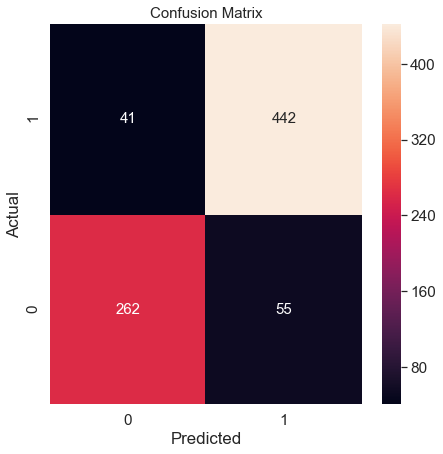

In [387]:
evaluation(y_auto_test, y_auto_predicted)

### As we can see, when evaluating the Automotive_classifier on the Automotive Test Data, the classifier provides with an accuracy of 88%



## Testing the Automotive Classifier on Test data for Cafes Category

In [388]:
#using the automotive classifier on x_cafes_test that is the test set for category Cafe
y_auto_cafe_predicted = automotive_classifier.predict(x_cafes_test)

[[ 31 193]
 [ 68 508]]
              precision    recall  f1-score   support

    Negative       0.31      0.14      0.19       224
    Positive       0.72      0.88      0.80       576

    accuracy                           0.67       800
   macro avg       0.52      0.51      0.49       800
weighted avg       0.61      0.67      0.63       800

0.67375


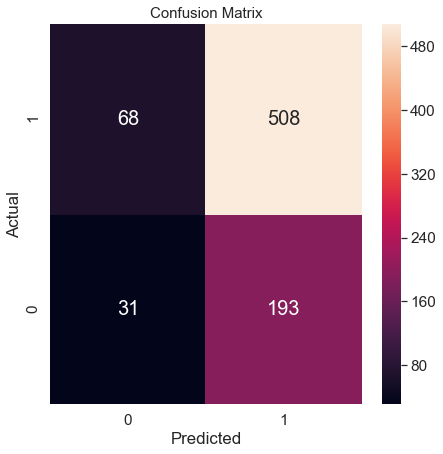

In [389]:
evaluation(y_cafes_test, y_auto_cafe_predicted)

### We can see that the accuracy obtained when Automotive_classifier is used on Cafes test data is 67.37%

## Using the Automotive_Classifier on the test data for Category Fashion

In [390]:
#using the automotive classifier on x_fashion_test that is the test set for category Fashion
y_auto_fashion_predicted = automotive_classifier.predict(x_fashion_test)

[[ 34 284]
 [ 37 445]]
              precision    recall  f1-score   support

    Negative       0.48      0.11      0.17       318
    Positive       0.61      0.92      0.73       482

    accuracy                           0.60       800
   macro avg       0.54      0.52      0.45       800
weighted avg       0.56      0.60      0.51       800

0.59875


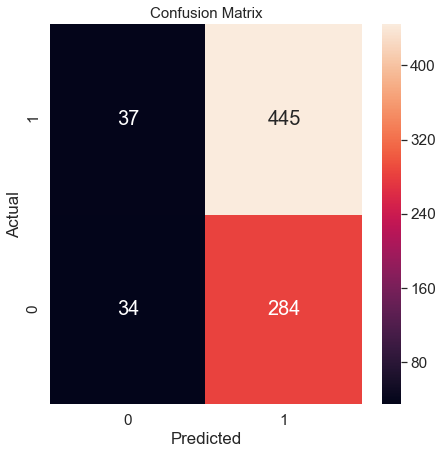

In [391]:
evaluation(y_fashion_test, y_auto_fashion_predicted)

### We can see that the accuracy obtained for when Automotive_classifier is used on Fashion data is 59.87% 

# Training the classifier on the training data from Category: Cafes

In [392]:
#Using the RandomForestClassifier on category cafes with estimators initialized to 100
cafes_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

cafes_classifier.fit(x_cafes_train, y_cafes_train)  #Training the classifier with the reviews for cafes

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Testing the Cafe Classifier on Test data for Cafe Reviews

[[ 77 147]
 [  7 569]]
              precision    recall  f1-score   support

    Negative       0.92      0.34      0.50       224
    Positive       0.79      0.99      0.88       576

    accuracy                           0.81       800
   macro avg       0.86      0.67      0.69       800
weighted avg       0.83      0.81      0.77       800

0.8075


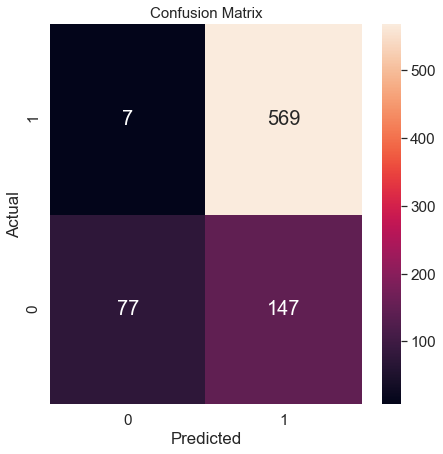

In [393]:
#Using the classifier which has been trained on Cafe Reviews on the test data of Cafe
y_cafes_predicted = cafes_classifier.predict(x_cafes_test) 

#Running it through the evaluation function to get the accuracy and other details
evaluation(y_cafes_test,y_cafes_predicted) 

### We can see that the accuracy obtained for when Cafe_classifier is used on Cafes test data is 80.75%

### Testing the Cafe_Classifier on Test data for Fashion Reviews

[[ 10 308]
 [ 22 460]]
              precision    recall  f1-score   support

    Negative       0.31      0.03      0.06       318
    Positive       0.60      0.95      0.74       482

    accuracy                           0.59       800
   macro avg       0.46      0.49      0.40       800
weighted avg       0.49      0.59      0.47       800

0.5875


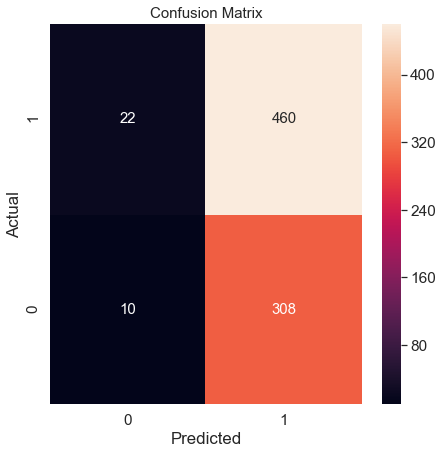

In [319]:
#running the test data for fashion reviews through the classifier built on the category Cafes
y_cafe_fashion_predicted = cafes_classifier.predict(x_fashion_test)  

evaluation(y_fashion_test,y_cafe_fashion_predicted) #passing it through the evaluation function

#### We can see that the accuracy obtained for when Cafe classifier is used on Fashion test data is 58.75%

### Testing the Cafe Classifier on Test data for Automotive Reviews

[[ 64 253]
 [ 42 441]]
              precision    recall  f1-score   support

    Negative       0.60      0.20      0.30       317
    Positive       0.64      0.91      0.75       483

    accuracy                           0.63       800
   macro avg       0.62      0.56      0.53       800
weighted avg       0.62      0.63      0.57       800

0.63125


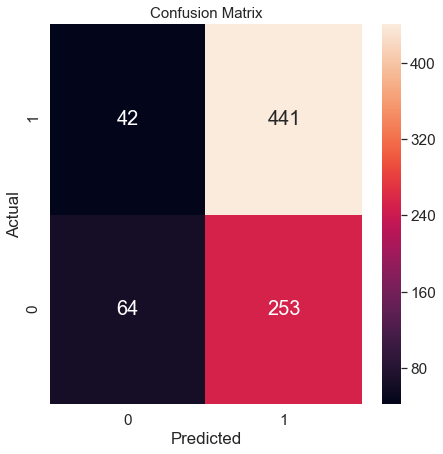

In [394]:
#running the test data for automotive reviews through the classifier built on the category Cafes
y_cafe_automotive_predicted = cafes_classifier.predict(x_auto_test)  

evaluation(y_auto_test,y_cafe_automotive_predicted) 

### We can see that the accuracy obtained for when Cafes_classifier is used on Automotive test data is 63.12%

# Training the classifier on the Category: Fashion 

In [395]:
#Initiaizing the classifier for category fashion with estimators = 100
fashion_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

#Training the classifier with the reviews for fashion category itself
fashion_classifier.fit(x_fashion_train, y_fashion_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Testing the Classifier built on Fashion training data reviews on Test data for Fashion Reviews 

[[218 100]
 [ 21 461]]
              precision    recall  f1-score   support

    Negative       0.91      0.69      0.78       318
    Positive       0.82      0.96      0.88       482

    accuracy                           0.85       800
   macro avg       0.87      0.82      0.83       800
weighted avg       0.86      0.85      0.84       800

0.84875


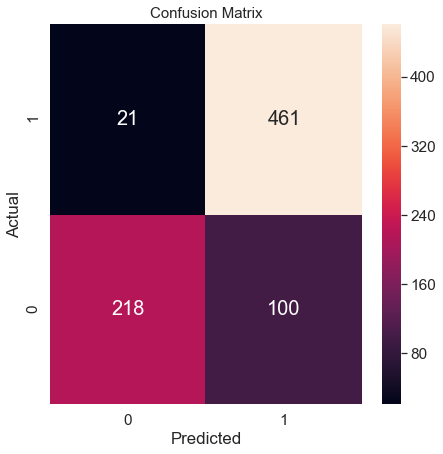

In [396]:
#Using the classifier which has been trained on Fashion Reviews on the test data of Fashion category itself
y_fashion_predicted = fashion_classifier.predict(x_fashion_test) 

#Running it through the evaluation function to get the accuracy and other details
evaluation(y_fashion_test,y_fashion_predicted) 

#### We can see that the accuracy obtained for when Fashion_classifier is used on Fashion test data is 84.87%

### Testing the Classifier built on Fashion reviews on Test data for Automotive Reviews 

[[ 64 253]
 [ 92 391]]
              precision    recall  f1-score   support

    Negative       0.41      0.20      0.27       317
    Positive       0.61      0.81      0.69       483

    accuracy                           0.57       800
   macro avg       0.51      0.51      0.48       800
weighted avg       0.53      0.57      0.53       800

0.56875


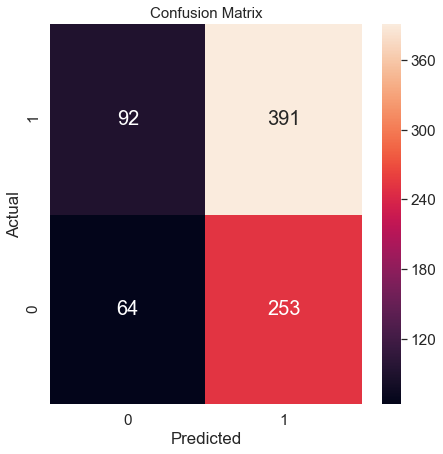

In [397]:
#running the test data for automotive reviews through the classifier built on the category Fashion
y_fashion_automotive_predicted = fashion_classifier.predict(x_auto_test)  

evaluation(y_auto_test,y_fashion_automotive_predicted) 

#### We can see that the accuracy obtained for when Fashion_classifier is used on Automotive test data is 56.87%

### Testing the Classifier built on Fashion reviews on Test data for Fashion Reviews

[[ 27 197]
 [ 48 528]]
              precision    recall  f1-score   support

    Negative       0.36      0.12      0.18       224
    Positive       0.73      0.92      0.81       576

    accuracy                           0.69       800
   macro avg       0.54      0.52      0.50       800
weighted avg       0.63      0.69      0.63       800

0.69375


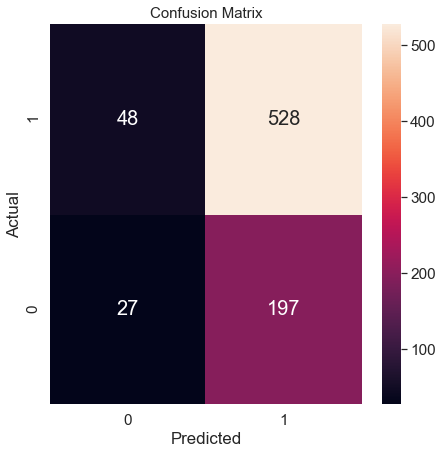

In [398]:
#running the test data for automotive reviews through the classifier built on the category Fashion
y_fashion_cafes_predicted = fashion_classifier.predict(x_cafes_test)  

evaluation(y_cafes_test,y_fashion_cafes_predicted)

#### We can see that the accuracy obtained for when Fashion_classifier is used on Cafes test data is 69.37%

## CONCLUSION
### Task 1: To select 3 categories and parsing and scraping data from the websites: Completed
### Task 2: To train one of the classifiers on one category and check its performance: Completed
### Task 3: To use the same classifier on the other two categories and check its performance: Completed

##### Overall, we can see that when a classifier is trained on Automotive's training data and used on Automotive's testing set, it gives much more accuracy than when it is used on testing set from Cafe and Fashion category. Similaryly, when the Classifier trained on Cafes training data is used on testing set of Cafe Reviews, it gives much accuracy than when it is used on Automotive's testing data and Fashion's testing data. It's the same case with Fashion's classifier too. Concluding that, the RandomForest Classifier works best when it is applied onto the same categories testing data who's training data was used to train the classifier, but performs less accurately when used on the other two categories.